# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

### Student Information

_Full Name (Last Name, First Name)_: Geraldino, Simon Paul Andrew M.\
_Student No._: 2020-11068\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Simon Paul Andrew M. Geraldino**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on #cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

In [7]:
!pip install corner

In [8]:
# Imports the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner
import matplotlib.lines as mlines

from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/My Drive/AP 157/Module C2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Converts the .csv files to Dataframes
ligo = pd.read_csv(file_path + "LIGO.csv")
lisa = pd.read_csv(file_path + "LISA.csv")
et = pd.read_csv(file_path + "ET.csv")

In [10]:
display(ligo)

,zLIGO,dlLIGO,errLIGO
0,0.033270,0.101250,0.026146
1,0.106210,0.698621,0.137968
2,0.073820,0.338016,0.067550
3,0.047333,0.206075,0.034506
4,0.113966,0.401371,0.159718
...,...,...,...
95,0.140751,0.607664,0.249926
96,0.170735,1.064420,0.380081
97,0.073560,0.278404,0.067117
98,0.113640,0.456064,0.158766


In [11]:
display(lisa)

,zLISA,dlLISA,errLISA
0,1.743477,11.980274,0.546082
1,6.271602,53.889134,8.248728
2,1.501697,10.566134,0.389478
3,4.802593,41.118583,5.002363
4,1.792854,13.767077,0.581335
5,4.170236,35.791386,3.854689
6,2.905967,25.715151,2.027844
7,2.672456,21.950601,1.761224
8,0.104850,0.480592,0.009098
9,1.150126,7.805579,0.210109


In [12]:
display(et)

,zET,dlET,errET
0,0.943093,5.611648,0.826565
1,1.853726,7.475383,3.542138
2,1.050134,7.436797,1.043646
3,1.408336,11.949542,1.967179
4,1.332070,9.204053,1.744991
...,...,...,...
95,1.134726,8.017421,1.234291
96,1.167672,9.146274,1.313123
97,1.858902,19.006901,3.563229
98,1.064504,5.306225,1.074841


By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

In [13]:
# Constructs the arrays for the luminosity distance (d_L), error in the luminosity distance (err),
# and redshift (z) from LIGO, LISA, and ET observatories

# LIGO
dlLIGO = ligo['dlLIGO'].values
dlLISA = lisa['dlLISA'].values
dlET = et['dlET'].values

# LISA
errLIGO = ligo['errLIGO'].values
errLISA = lisa['errLISA'].values
errET = et['errET'].values

# ET
zLIGO = ligo['zLIGO'].values
zLISA = lisa['zLISA'].values
zET = et['zET'].values

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

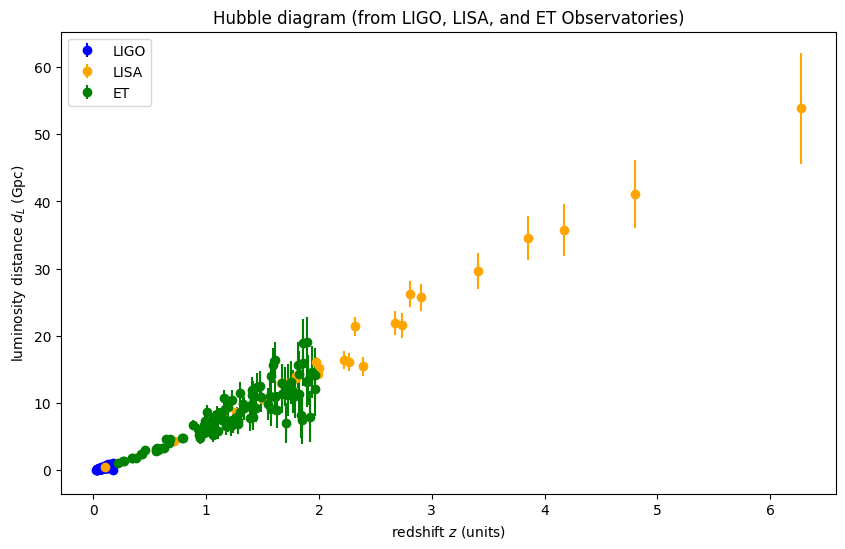

In [14]:
# Creates the hubble diagrams for the three observatories (LIGO, LISA, ET)
fig, ax = plt.subplots(figsize=(10,6))

# Plots the scatter plot for d_L (y-axis) and z (x-axis) with err as the errorbars for d_L
plt.errorbar(zLIGO, dlLIGO, yerr = errLIGO, label = "LIGO", fmt = 'o', color = "blue")
plt.errorbar(zLISA, dlLISA, yerr = errLISA, label = "LISA", fmt = 'o', color = "orange")
plt.errorbar(zET, dlET, yerr = errET, label = "ET", fmt = 'o', color = "green")

# Sets the parameters for the graph
ax.set_ylabel("luminosity distance $d_L$ (Gpc)")
ax.set_xlabel("redshift $z$ (units)")
ax.set_title("Hubble diagram (from LIGO, LISA, and ET Observatories)")

# Shows the legend
plt.legend(loc = "upper left")

# Shows the plot
plt.show()

We observe a linear relationship between the luminosity distance $d_{\text{L}}$ and redshift $z$. This is consistent with the notion that the farther an object is, the faster it redshifts, meaning that the object is moving away from us.

Another observation we can conclude from this diagram is the strength of the observatory to observe objects. We can see that there seems to be an increasing luminosity distances of the objects starting from LIGO to ET to LISA. This means that there is an increasing quality in the specifications of these instruments to collect data far away from Earth.

#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




In [15]:
from astropy.cosmology import FlatLambdaCDM

In [16]:
# Defines the chi-square function for LIGO
def chi2LIGO_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      # define cosmological model
    model = np.array(cosmo.luminosity_distance(zLIGO)/1000) # converted from Gpc to Mpc units
    dev = (model - np.array(dlLIGO))/np.array(errLIGO)      # deviations between model and data
    chi2 = sum(dev**2)
    return chi2

# Defines the chi-square function for LISA
def chi2LISA_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLISA)/1000)
    dev = (model - np.array(dlLISA))/np.array(errLISA)
    chi2 = sum(dev**2)
    return chi2

# Defines the chi-square function for ET
def chi2ET_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zET)/1000)
    dev = (model - np.array(dlET))/np.array(errET)
    chi2 = sum(dev**2)
    return chi2

# Defines the likelihood function for LIGO dataset
def llikeLIGO_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0) or (Om0 > 1):
        return -np.inf                        # return inf if outside priors
    else:
        return -0.5*chi2LIGO_lcdm(H0, Om0)

# Defines the likelihood function for LIGO + LISA dataset
def llikeLIGOLISA_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0) or (Om0 > 1):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0))

# Defines the likelihood function for LIGO + LISA + ET dataset
def llikeLIGOLISAET_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0) or (Om0 > 1):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0) + chi2ET_lcdm(H0, Om0))

In [17]:
# Defines the function that returns the likelihood function for LIGO dataset
def lnprob_LIGO(x):
  H0, Om0 = x
  return llikeLIGO_lcdm(H0, Om0)

# Defines the function that returns the likelihood function for LIGO + LISA dataset
def lnprob_LIGOLISA(x):
  H0, Om0 = x
  return llikeLIGOLISA_lcdm(H0, Om0)

# Defines the function that returns the likelihood function for LIGO + LISA + ET dataset
def lnprob_LIGOLISAET(x):
  H0, Om0 = x
  return llikeLIGOLISAET_lcdm(H0, Om0)

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can use number of walkers (nwalkers) of 100 and number of iterations (niter) of 1,000 and number of burn-in samples (nburn) of 100.


In [18]:
# Given values
nwalkers = 100   #number of walkers
ntier = 1000     #number of iterations
nburn = 100      #number of burn-in samples
ndim = 2         #number of dimensions

dres = [0.1, 0.003]
initial = np.array([70., 0.3])
p0 = [initial + dres * np.random.randn(ndim) for i in range(nwalkers)]

In [19]:
# Runs outputs of the MCMC for LIGO
sampler_LIGO = emcee.EnsembleSampler(nwalkers, ndim, lnprob_LIGO)
sampler_LIGO.run_mcmc(p0, ntier, progress = True)
samples_LIGO = sampler_LIGO.get_chain(discard = 10, thin = 2, flat = True)

100%|██████████| 1000/1000 [03:36<00:00,  4.62it/s]


In [20]:
# Runs outputs of the MCMC for LIGO + LISA
sampler_LIGOLISA = emcee.EnsembleSampler(nwalkers, ndim, lnprob_LIGOLISA)
sampler_LIGOLISA.run_mcmc(p0, ntier, progress = True)
samples_LIGOLISA = sampler_LIGOLISA.get_chain(discard = 10, thin = 2, flat = True)

100%|██████████| 1000/1000 [06:46<00:00,  2.46it/s]


In [21]:
# Runs outputs of the MCMC for LIGO + LISA + ET
sampler_LIGOLISAET = emcee.EnsembleSampler(nwalkers, ndim, lnprob_LIGOLISAET)
sampler_LIGOLISAET.run_mcmc(p0, ntier, progress = True)
samples_LIGOLISAET = sampler_LIGOLISAET.get_chain(discard = 10, thin = 2, flat = True)

100%|██████████| 1000/1000 [10:38<00:00,  1.56it/s]


#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.

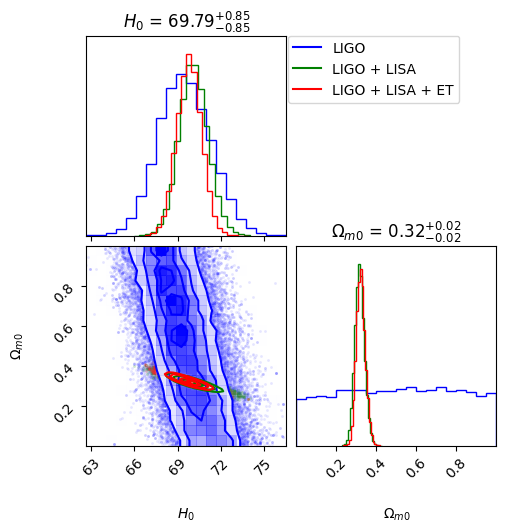

In [24]:
# Creates the corner.corner plots for our output
labels = ["$H_{0}$", "$\Omega_{m0}$"]

fig1 = corner.corner(samples_LIGO,
                     color = "blue",
                     labels = labels,
                     show_titles = True,
                     label = "LIGO")

fig2 = corner.corner(samples_LIGOLISA,
                     color = "green",
                     label = "LIGO + LISA",
                     labels = labels,
                     show_titles = True,
                     fig=fig1)

fig3 = corner.corner(samples_LIGOLISAET,
                     color = "red",
                     label = "LIGO + LISA + ET",
                     labels = labels,
                     show_titles = True,
                     fig=fig2)

# Creates the legend for our output
blue_line = mlines.Line2D([],[], color="blue", label="LIGO")
green_line = mlines.Line2D([],[], color="green", label="LIGO + LISA")
red_line = mlines.Line2D([],[], color="red", label="LIGO + LISA + ET")

plt.legend(handles=[blue_line, green_line, red_line], bbox_to_anchor=(0.85, 1.68), loc=4)

# Shows the plot
plt.show()

We show here in the corner plot are the different samples from the MCMC runs. The more data is involved (for example: LIGO vs. LIGO + LISA), the more precise the graph will appear in the corner plot. Eventually, when the LIGO + LISA + ET dataset is added, the smaller the graphs and the ellipses will appear in the plot, thus, the more constraints are added.